# Historical CO₂ levels in periods of global greening

## Data and calculations

By: Frans J. Schrijver

Date published: 2025-07-14  
Date updated: 2025-10-16

## Nomenclature 

| Name | Short | Description | Unit |
|---|---|---|---|
| CO₂ level | c | Total carbon dioxide in the atmosphere, measured by carbon mass | PgC |
| Down flux | d | Annual flow of CO₂ from the atmosphere to land and/or oceans | PgCyr<sup>-1</sup> |
| Up flux | u | Annual flow of CO₂ to the atmosphere from land and/or oceans | PgCyr<sup>-1</sup> |
| GPP | p | Gross Primary Production from land and/or oceans | PgCyr<sup>-1</sup> |
| Residence Time | τ | Average time CO₂ remains in the atmosphere | yr |
| Terrestrial | T | From or to land | e.g. d<sub>T</sub> = down flux to land |
| Oceanic | O | From or to oceans | e.g. p<sub>O</sub> = GPP from oceans |
| Global | G | Global (from of to oceans and/or land) | e.g. p<sub>G</sub> = Global GPP |


## Equations

### Residence Time

At any moment in time (t) the residence time (for all CO₂) is equal to the CO₂ level in the atmosphere divided by the total down flux to land and oceans.

$$τ(t) = \frac{c(t)}{d_G(t)}$$

$$c(t) = d_G(t)\cdot τ(t)$$


### Mitscherlich's Law

ß is defined as the relative increase in gross primary production (p) in response to an increase in atmospheric CO2 concentration (c). The general form for Earth's greening it can be written as follows:

$$\beta = \frac{dp}{dc} = B\cdot(A-p)$$


where A is the attainable yield, in this case the maximum GPP (with other factors constant), B is a constant related to the efficiency of the input (CO₂). 

By solving the differential equation, Mitscherlich’s Law for the terrestrial greening of the Earth can be written as follows (with p<sub>T</sub> as the terrestrial GPP):

$$p_T = A\left(1-\exp\left(-B\left(c-C_0\right)\right)\right)$$


Photosynthesis typically stops functioning at CO₂ concentrations below 150 ppm. This level can be regarded as a starting point in the equation, which is reflected in the value 318.6 PgC for C<sub>0</sub> (which is equal to 150 ppm). 

Expressing the CO₂ level c in p<sub>T</sub> (terrestrial GPP), results in

$$c = \frac{1}{B} \ln\left(1 - \frac{p_T}{A}\right)$$


If we assume that the fertilization effect of CO₂ in the oceans that is proportional to the increase of terrestrial photosynthesis, it follows that:

$$p_O = \alpha p_T$$

$$d_G = p_T + p_O = (1 + \alpha) p_T$$


$$\tau = \frac{\left(C_0 - \frac{1}{B} \ln \left(1 - \frac{p_T}{A}\right)\right)}{p_T(1 + \alpha)}$$


If we assume no fertilization effect in the oceans (most extreme case), then the oceanic down flux is not influenced by the CO₂ level, so we assume a stable down flux to be d<sub>O</sub>.

$$p_O = d_O$$


$$d_G = p_T + p_O = p_T + d_O$$


$$\tau = \frac{\left(C_0 - \frac{1}{B} \ln\left(1 - \frac{p_T}{A}\right)\right)}{p_T +d_O}$$




# Definitions of datasets

| Name | Description | source |
|---|---|---|
| keeling_data | CO₂ level in Mauna Loa per year, from 1982-2016 | https://gml.noaa.gov/ccgg/trends/data.html |
| wang_data | Terrestrial GPP per year, from 1982-2016. See image below | Wang 2024, https://doi.org/10.34133/ehs.0278|
| ipcc_1750 | Estimate IPCC for 1750 | IPCC-AR6 2021, https://doi.org/10.1017/9781009157896 |
| gcb_2023 | Estimate GCB for 2022 | Friedlingstein 2023, https://doi.org/10.5194/essd-15-5301-2023 |
| wang_original | Merge of Keeling and Wang to (c, p)-values |
| wang_global_p | wang_original + proportional fertilization effect in oceans |
| wang_global_f | wang_original + fixed down flux to the oceans (no fertilization effect)|
| wang_global_p_ext | wang_global_p + ipcc_1750 + gcb_2023 |

The GPP data comes from Wang, Z. et al., 2024: Evolution of Global Terrestrial Gross Primary Productivity Trend, Ecosystem Health and Sustainability, 10, p. 0278. https://doi.org/10.34133/ehs.0278. In the following chart the red dots represent the mean values of the eight models for each year.

<img src="./zotero_FvzVp7R10p.png" width="60%">

## Merge the two external datasets to (c, p)-values 

In [1]:
import pandas as pd
from io import StringIO
# from io import StringIO
import io

# Data for Keeling
keeling_data = """y;c
1982;725.30
1983;728.85
1984;732.46
1985;735.65
1986;738.32
1987;741.93
1988;746.99
1989;750.20
1990;752.85
1991;755.51
1992;757.29
1993;758.71
1994;762.43
1995;766.70
1996;770.46
1997;772.88
1998;779.17
1999;782.78
2000;785.26
2001;788.68
2002;793.21
2003;798.58
2004;802.23
2005;807.08
2006;811.56
2007;815.66
2008;819.50
2009;823.35
2010;828.57
2011;832.29
2012;836.98
2013;842.68
2014;847.07
2015;851.75
2016;858.97
"""
df_keeling = pd.read_csv(StringIO(keeling_data), sep=';')

# Data for Wang
wang_data = """y;p
1982;112.08
1983;111.65
1984;113.16
1985;114.10
1986;115.25
1987;113.97
1988;114.62
1989;116.13
1990;117.85
1991;115.71
1992;114.85
1993;116.29
1994;116.22
1995;117.80
1996;118.45
1997;120.39
1998;119.75
1999;119.11
2000;120.41
2001;120.27
2002;118.34
2003;118.63
2004;119.57
2005;119.07
2006;120.44
2007;120.30
2008;120.09
2009;119.95
2010;121.17
2011;122.40
2012;120.54
2013;121.12
2014;121.98
2015;120.62
2016;122.85
"""
df_wang = pd.read_csv(StringIO(wang_data), sep=';')

# Merge the two DataFrames on the 'y' column
wang_original = pd.merge(df_keeling, df_wang, on='y')

# Select only 'c' and 'p' columns as requested
final_df = wang_original[['c', 'p']]

print(final_df.head())


        c       p
0  725.30  112.08
1  728.85  111.65
2  732.46  113.16
3  735.65  114.10
4  738.32  115.25


## Create adjusted datasets

- wang_global_p: wang_original + proportional fertilization effect in oceans
- wang_global_f: wang_original + fixed down flux to the oceans (no fertilization effect)
- ipcc_1750: estimate IPCC for 1750
- gcb_2023: estimate GCB for 2022
- wang_global_p_ext: wang_global_p + ipcc_1750 + gcb_2023

In [2]:
# Create a new dataset wang_global_p by multiplying each 'p' value in wang_original by 1.74794
wang_global_p = wang_original.copy()
wang_global_p['p'] = wang_global_p['p'] * 1.74794

# Create a new dataset wang_global_f by adding 91.89 to each 'p' value in wang_original
wang_global_f = wang_original.copy()
wang_global_f['p'] = wang_global_f['p'] + 91.89

# New data points to be plotted in green
c_new_points = [591, 885]
p_new_points = [167, 216]
labels_new_points = ["Value 1750 (IPCC-AR6)", "Value 2022 (GCB-2023)"]


# Define ipcc_1750 dataset
ipcc_1750 = pd.DataFrame({'c': [591], 'p': [167]})

# Define gcb_2023 dataset
gcb_2023 = pd.DataFrame({'c': [885], 'p': [216]})

# Merge wang_global_p, ipcc_1750, and gcb_2023 into a new DataFrame
wang_global_p_ext = pd.concat([wang_global_p, ipcc_1750, gcb_2023], ignore_index=True)
wang_global_f_ext = pd.concat([wang_global_f, ipcc_1750, gcb_2023], ignore_index=True)


# Calculate optimal fit with wang_original

- Original dataset: mean of 8 models (Wang 2024)
- Best fit based on Mischerlich's Law: p = A(1 - exp(-B(c - C0))) with C0 = 318.6 (150 ppm)
- Total = terrestrial

In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # Import for potential tick formatting

# Read the data into a pandas DataFrame

# Define the non-linear function to fit
# p = A(1 - exp(-B(c - 318.6)))
def fit_function(c, A, B):
    return A * (1 - np.exp(-B * (c - 318.6)))

# Extract 'c' and 'p' values from the DataFrame
c_data = wang_original['c'].values
p_data = wang_original['p'].values

# Provide an initial guess for the parameters A and B
initial_guess = [np.max(p_data), 0.01]

# Perform the curve fitting using scipy.optimize.curve_fit
try:
    params, covariance = curve_fit(fit_function, c_data, p_data, p0=initial_guess)
except RuntimeError as e:
    print(f"Error: {e}. Could not find a fit. This might be due to bad initial guess or data that doesn't fit the model.")
    params = [np.nan, np.nan] # Set params to NaN if fit fails

# Extract the optimal parameters A and B from the fit results
A_opt_t, B_opt_t = params

print(f"Optimal A: {A_opt_t:.4f}")
print(f"Optimal B: {B_opt_t:.4f}")

# --- Calculate and display error metrics ---

# Calculate predicted 'p' values for the original 'c_data' using the fitted model
p_predicted = fit_function(c_data, A_opt_t, B_opt_t)

# Calculate residuals (differences between actual and predicted 'p' values)
residuals = p_data - p_predicted

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(residuals**2))

# Calculate R-squared (R^2)
ss_total = np.sum((p_data - np.mean(p_data))**2) # Total sum of squares
ss_residual = np.sum(residuals**2) # Sum of squares of
r_squared = 1 - (ss_residual / ss_total) # R-squared formula

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r_squared:.4f}")


Optimal A: 133.4964
Optimal B: 0.0047
Root Mean Squared Error (RMSE): 1.1500
R-squared (R^2): 0.8506


# Plot GPP vs. Atmospheric CO₂ (only terrestrial data from Wang 2024)

- Dataset wang_original
- Best fit based on Mischerlich's Law: p = A(1 - exp(-B(c - C0))) with C0 = 318.6 (150 ppm)
- Total = terrestrial

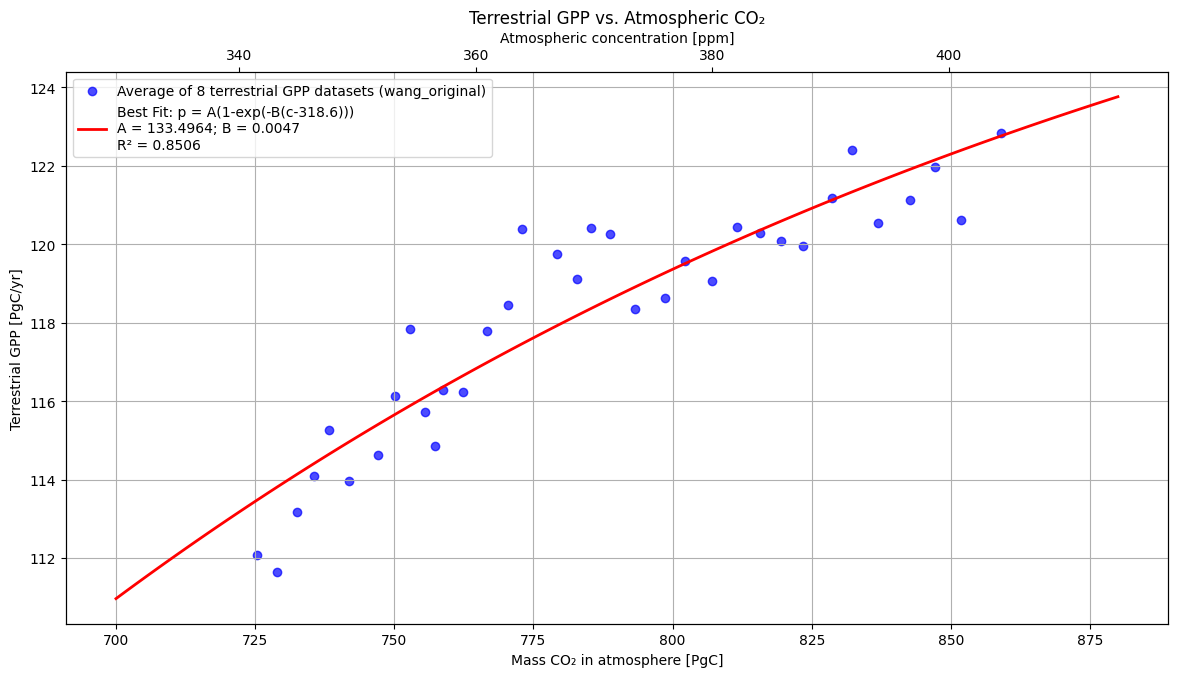

In [4]:
# --- Plotting the original data and the best fit line ---

# Generate a range of 'c' values for plotting the smooth fitted curve
c_fit = np.linspace(min(c_data), max(c_data), 100)
c_fit = np.linspace(700, 880, 100)
# Calculate the corresponding 'p' values using the fitted function and optimal parameters
p_fit = fit_function(c_fit, A_opt_t, B_opt_t)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 7)) # Use subplots to get an axes object (ax1)

ax1.scatter(c_data, p_data, label='Average of 8 terrestrial GPP datasets (wang_original)', color='blue', alpha=0.7) # Plot original data points
ax1.plot(c_fit, p_fit, color='red', linewidth=2,
        #  label=f'Best Fit: p = {A_opt_t:.4f}(1 - exp(-{B_opt_t:.4f}(c - 318.6)))\nR² = {r_squared:.4f}') # Plot the fitted curve
         label=f'Best Fit: p = A(1-exp(-B(c-318.6)))\nA = {A_opt_t:.4f}; B = {B_opt_t:.4f}\nR² = {r_squared:.4f}') # Plot the fitted curve
ax1.set_xlabel('Mass CO₂ in atmosphere [PgC]') # Label for the x-axis with units
ax1.set_ylabel('Terrestrial GPP [PgC/yr]') # Label for the y-axis
ax1.set_title('Terrestrial GPP vs. Atmospheric CO₂') # Title of the plot
ax1.legend() # Display the legend
ax1.grid(True) # Show grid for better readability

# --- Add a second horizontal axis ---
ax2 = ax1.twiny() # Create a twin Axes sharing the y-axis

# Define the conversion factor: 1 ppm = 2.124 PgC
PgC_per_ppm = 2.124

# Function to convert PgC values to ppm values
def PgC_to_ppm_converter(PgC_value):
    return PgC_value / PgC_per_ppm

# Get the limits of the primary x-axis (PgC)
xlim_PgC = ax1.get_xlim()

# Set the limits of the secondary x-axis (ppm) by converting primary limits
ax2.set_xlim(PgC_to_ppm_converter(xlim_PgC[0]), PgC_to_ppm_converter(xlim_PgC[1]))

# Set the label for the second axis
ax2.set_xlabel('Atmospheric concentration [ppm]')

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.rc('font', size=17.5)          # controls default text sizes
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('GPP vs. Atmospheric CO₂ (only terrestrial data from Wang 2024).png') # Save the plot as an image file


# Calculate optimal fit for proportional global data Wang

- Dataset wang_global_p: globalized mean of 8 models (proportional fertilization from oceans)
- Best fit based on Mischerlich's Law: p = A(1 - exp(-B(c - C0))) with C0 = 318.6 (150 ppm)
- Total = terrestrial + oceans

In [5]:

# Read the data into a pandas DataFrame

# Define the non-linear function to fit
# p = A(1 - exp(-B(c - 318.6)))
def fit_function(c, A, B):
    return A * (1 - np.exp(-B * (c - 318.6)))

# Extract 'c' and 'p' values from the DataFrame
c_data = wang_global_p['c'].values
p_data = wang_global_p['p'].values

# Provide an initial guess for the parameters A and B
initial_guess = [np.max(p_data), 0.01]

# Perform the curve fitting using scipy.optimize.curve_fit
try:
    params, covariance = curve_fit(fit_function, c_data, p_data, p0=initial_guess)
except RuntimeError as e:
    print(f"Error: {e}. Could not find a fit. This might be due to bad initial guess or data that doesn't fit the model.")
    params = [np.nan, np.nan] # Set params to NaN if fit fails

# Extract the optimal parameters A and B from the fit results
A_opt_g, B_opt_g = params

# --- Calculate and display error metrics ---

# Calculate predicted 'p' values for the original 'c_data' using the fitted model
p_predicted = fit_function(c_data, A_opt_g, B_opt_g)

# Calculate residuals (differences between actual and predicted 'p' values)
residuals = p_data - p_predicted

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(residuals**2))

# Calculate R-squared (R^2)
ss_total = np.sum((p_data - np.mean(p_data))**2) # Total sum of squares
ss_residual = np.sum(residuals**2) # Sum of squares of
r_squared = 1 - (ss_residual / ss_total) # R-squared formula

print(f"Optimal A: {A_opt_g:.4f}")
print(f"Optimal B: {B_opt_g:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r_squared:.4f}")


Optimal A: 233.3437
Optimal B: 0.0047
Root Mean Squared Error (RMSE): 2.0102
R-squared (R^2): 0.8506


# Calculate optimal fit for global data Wang, no oceanic CO₂ fertilization effect

- Dataset wang_global_p: globalized mean of 8 models (no fertilization from oceans)
- Best fit based on Mischerlich's Law: p = A(1 - exp(-B(c - C0))) with C0 = 318.6 (150 ppm)
- Total = terrestrial + oceans

In [6]:

# Read the data into a pandas DataFrame

# Define the non-linear function to fit
# p = A(1 - exp(-B(c - 318.6)))
def fit_function(c, A, B):
    return A * (1 - np.exp(-B * (c - 318.6)))

# Extract 'c' and 'p' values from the DataFrame
c_data = wang_global_f['c'].values
p_data = wang_global_f['p'].values

# Provide an initial guess for the parameters A and B
initial_guess = [np.max(p_data), 0.01]

# Perform the curve fitting using scipy.optimize.curve_fit
try:
    params, covariance = curve_fit(fit_function, c_data, p_data, p0=initial_guess)
except RuntimeError as e:
    print(f"Error: {e}. Could not find a fit. This might be due to bad initial guess or data that doesn't fit the model.")
    params = [np.nan, np.nan] # Set params to NaN if fit fails

# Extract the optimal parameters A and B from the fit results
A_opt_f, B_opt_f = params

# --- Calculate and display error metrics ---

# Calculate predicted 'p' values for the original 'c_data' using the fitted model
p_predicted = fit_function(c_data, A_opt_f, B_opt_f)

# Calculate residuals (differences between actual and predicted 'p' values)
residuals = p_data - p_predicted

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean(residuals**2))

# Calculate R-squared (R^2)
ss_total = np.sum((p_data - np.mean(p_data))**2) # Total sum of squares
ss_residual = np.sum(residuals**2) # Sum of squares of
r_squared_f = 1 - (ss_residual / ss_total) # R-squared formula

print(f"Optimal A: {A_opt_f:.4f}")
print(f"Optimal B: {B_opt_f:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r_squared_f:.4f}")


Optimal A: 221.3970
Optimal B: 0.0064
Root Mean Squared Error (RMSE): 1.1066
R-squared (R^2): 0.8617


# Plot GPP vs. Atmospheric CO₂ (proportional fertilization effect in ocean)

- Dataset wang_global_p
- Oceanic fertilization effect proportional to terrestrial effect
- Total = terrestrial + oceanic

Optimal A: 233.3437
Optimal B: 0.0047
Root Mean Squared Error (RMSE): 1.1066
R-squared (R^2): 0.8506


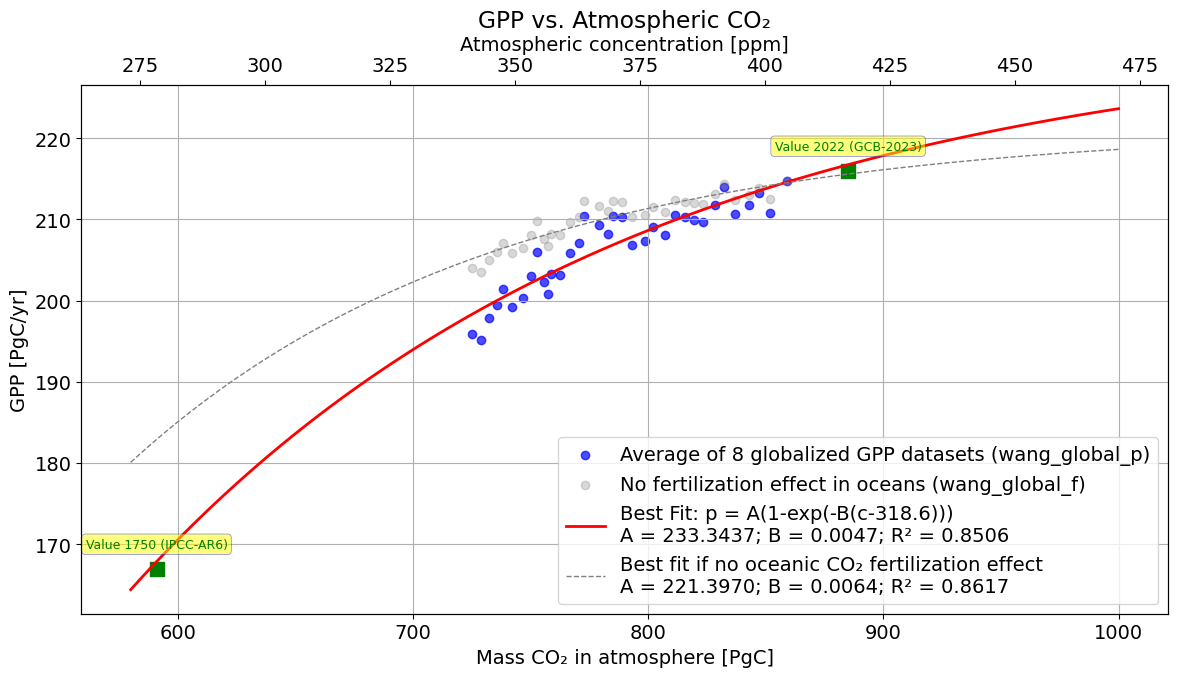

In [7]:
print(f"Optimal A: {A_opt_g:.4f}")
print(f"Optimal B: {B_opt_g:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r_squared:.4f}")

# Extract 'c' and 'p' values from the DataFrame
c_data = wang_global_p['c'].values
p_data = wang_global_p['p'].values
p_data_f = wang_global_f['p'].values

# Generate points for the extended fitted curve for plotting
c_extended_fit = np.linspace(580, 1000, 100)
p_extended_fit = fit_function(c_extended_fit, A_opt_g, B_opt_g)
p_extended_fit_f = fit_function(c_extended_fit, A_opt_f, B_opt_f) # no oceanic CO₂ fertilization effect

# --- Plotting ---
fig, ax1 = plt.subplots(figsize=(12, 7)) # Create figure and primary axes

# Plot original data points
ax1.scatter(c_data, p_data, label='Average of 8 globalized GPP datasets (wang_global_p)', color='blue', alpha=0.7)
ax1.scatter(c_data, p_data_f, label='No fertilization effect in oceans (wang_global_f)', color='gray', alpha=0.3)

# Plot the extended fitted curve
ax1.plot(c_extended_fit, p_extended_fit, color='red', linewidth=2,
         label=f'Best Fit: p = A(1-exp(-B(c-318.6)))\nA = {A_opt_g:.4f}; B = {B_opt_g:.4f}; R² = {r_squared:.4f}')

# Plot the extended fitted curve for the no oceanic CO₂ fertilization effect case
ax1.plot(c_extended_fit, p_extended_fit_f, color='gray', linewidth=1, linestyle='dashed',
         label=f'Best fit if no oceanic CO₂ fertilization effect\nA = {A_opt_f:.4f}; B = {B_opt_f:.4f}; R² = {r_squared_f:.4f}')

# Plot the new data points in green on the primary axis
ax1.scatter(c_new_points, p_new_points, color='green', s=100, marker="s")
for i in range(len(c_new_points)):
    ax1.annotate(labels_new_points[i], (c_new_points[i], p_new_points[i]),
                 textcoords="offset points", xytext=(0, 15), ha='center', color='green', fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", lw=0.5, alpha=0.5))

# Set labels for the primary axes
ax1.set_xlabel('Mass CO₂ in atmosphere [PgC]')
ax1.set_ylabel('GPP [PgC/yr]')
ax1.set_title('GPP vs. Atmospheric CO₂')
ax1.legend()
ax1.grid(True)

# --- Create a second horizontal axis ---
ax2 = ax1.twiny() # Create a twin Axes sharing the y-axis

# Define the conversion factor: 1 ppm = 2.124 PgC => PgC_value = ppm_value * 2.124
PgC_per_ppm = 2.124

# Function to convert PgC values to ppm values
def PgC_to_ppm_converter(PgC_value):
    return PgC_value / PgC_per_ppm

# Get the limits of the primary x-axis
xlim_PgC = ax1.get_xlim()

# Set the limits of the secondary x-axis by converting primary limits to ppm
ax2.set_xlim(PgC_to_ppm_converter(xlim_PgC[0]), PgC_to_ppm_converter(xlim_PgC[1]))

# Set the label for the second axis
ax2.set_xlabel('Atmospheric concentration [ppm]')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('GPP vs. Atmospheric CO₂ (proportional fertilization effect in ocean).png')


# Calculate optimal fit for global data Wang extended

- Dataset wang_global_p_ext
- Oceanic fertilization effect proportional to terrestrial effect
- Total = terrestrial + oceanic

In [8]:
# Read the data into a pandas DataFrame

# Define the non-linear function to fit
# p = A(1 - exp(-B(c - 318.6)))
def fit_function(c, A, B):
    return A * (1 - np.exp(-B * (c - 318.6)))

# Extract 'c' and 'p' values from the DataFrame
c_data = wang_global_p_ext['c'].values
p_data = wang_global_p_ext['p'].values
p_data_f = wang_global_f_ext['p'].values

# Provide an initial guess for the parameters A and B
initial_guess = [np.max(p_data), 0.01]

# Perform the curve fitting using scipy.optimize.curve_fit
try:
    params, covariance = curve_fit(fit_function, c_data, p_data, p0=initial_guess)
except RuntimeError as e:
    print(f"Error: {e}. Could not find a fit. This might be due to bad initial guess or data that doesn't fit the model.")
    params = [np.nan, np.nan] # Set params to NaN if fit fails

# Extract the optimal parameters A and B from the fit results
A_opt_g, B_opt_g = params

# --- Calculate and display error metrics ---

# Calculate predicted 'p' values for the original 'c_data' using the fitted model
p_predicted = fit_function(c_data, A_opt_g, B_opt_g)
residuals = p_data - p_predicted
rmse_g = np.sqrt(np.mean(residuals**2))
ss_total = np.sum((p_data - np.mean(p_data))**2) # Total sum of squares
ss_residual = np.sum(residuals**2) # Sum of squares of
r_squared_g = 1 - (ss_residual / ss_total) # R-squared formula

# Calculate predicted 'p' values for the original 'c_data' using the fitted model
p_predicted = fit_function(c_data, A_opt_f, B_opt_f)
residuals = p_data_f - p_predicted
rmse_f = np.sqrt(np.mean(residuals**2))
ss_total = np.sum((p_data_f - np.mean(p_data_f))**2) # Total sum of squares
ss_residual = np.sum(residuals**2) # Sum of squares of
r_squared_f = 1 - (ss_residual / ss_total) # R-squared formula

print(f"Optimal A: {A_opt_g:.4f}")
print(f"Optimal B: {B_opt_g:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_g:.4f}")
print(f"R-squared (R^2): {r_squared_g:.4f}")
print(f"Optimal A: {A_opt_f:.4f}")
print(f"Optimal B: {B_opt_f:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_f:.4f}")
print(f"R-squared (R^2): {r_squared_f:.4f}")


Optimal A: 233.6724
Optimal B: 0.0046
Root Mean Squared Error (RMSE): 1.9626
R-squared (R^2): 0.9446
Optimal A: 221.3970
Optimal B: 0.0064
Root Mean Squared Error (RMSE): 2.8272
R-squared (R^2): 0.8631


# PLot global GPP vs. Atmospheric CO₂ (Wang global extended)

- Dataset wang_global_p_ext
- Oceanic fertilization effect proportional to terrestrial effect
- Total = terrestrial + oceanic

Optimal A: 233.6724
Optimal B: 0.0046
Root Mean Squared Error (RMSE): 1.1066
R-squared (R^2): 0.8506


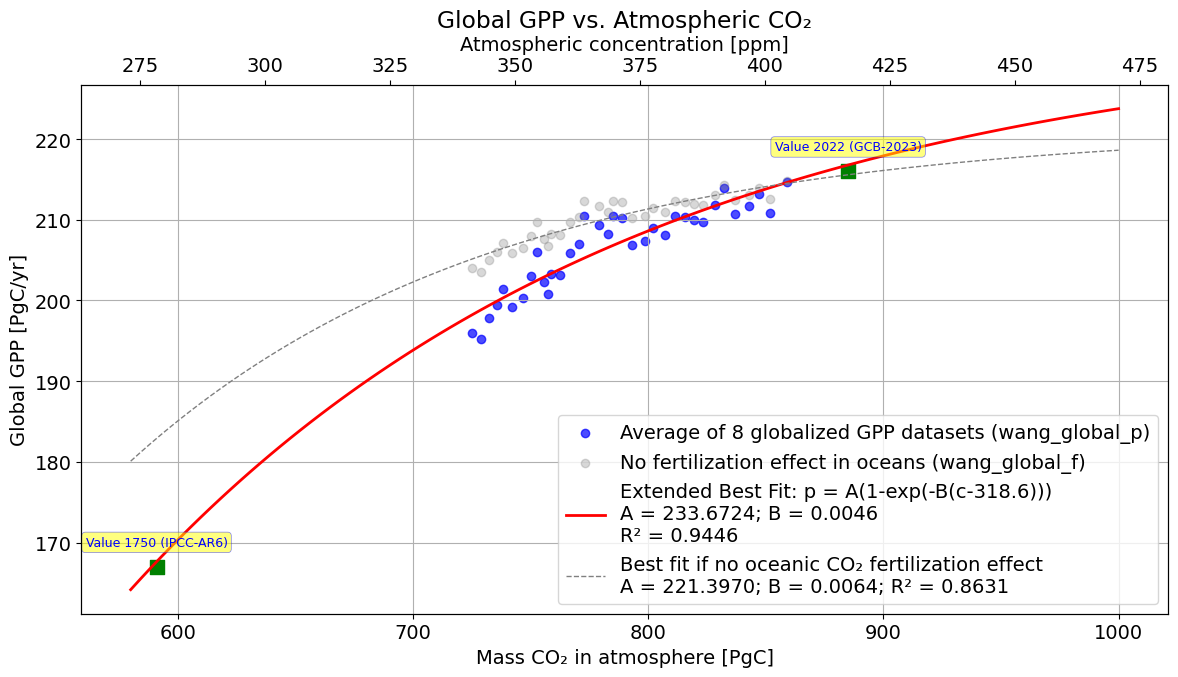

In [9]:
print(f"Optimal A: {A_opt_g:.4f}")
print(f"Optimal B: {B_opt_g:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r_squared:.4f}")

# Extract 'c' and 'p' values from the DataFrame
c_data = wang_global_p['c'].values
p_data = wang_global_p['p'].values
p_data_f = wang_global_f['p'].values

# Generate points for the extended fitted curve for plotting
c_extended_fit = np.linspace(580, 1000, 100)
p_extended_fit = fit_function(c_extended_fit, A_opt_g, B_opt_g)
p_extended_fit_f = fit_function(c_extended_fit, A_opt_f, B_opt_f) # no oceanic CO₂ fertilization effect

# --- Plotting ---
fig, ax1 = plt.subplots(figsize=(12, 7)) # Create figure and primary axes

# Plot original data points
ax1.scatter(c_data, p_data, label='Average of 8 globalized GPP datasets (wang_global_p)', color='blue', alpha=0.7)
ax1.scatter(c_data, p_data_f, label='No fertilization effect in oceans (wang_global_f)', color='gray', alpha=0.3)

# Plot the extended fitted curve
ax1.plot(c_extended_fit, p_extended_fit, color='red', linewidth=2,
         label=f'Extended Best Fit: p = A(1-exp(-B(c-318.6)))\nA = {A_opt_g:.4f}; B = {B_opt_g:.4f}\nR² = {r_squared_g:.4f}')
# Plot the extended fitted curve for the no oceanic CO₂ fertilization effect case
ax1.plot(c_extended_fit, p_extended_fit_f, color='gray', linewidth=1, linestyle='dashed',
         label=f'Best fit if no oceanic CO₂ fertilization effect\nA = {A_opt_f:.4f}; B = {B_opt_f:.4f}; R² = {r_squared_f:.4f}')

# Plot the new data points in green and annotate them
# ax1.scatter(c_new_points, p_new_points, color='blue', s=70, zorder=5) # zorder to ensure visibility
ax1.scatter(c_new_points, p_new_points, color='green', s=100, marker="s")
for i in range(len(c_new_points)):
    ax1.annotate(labels_new_points[i], (c_new_points[i], p_new_points[i]),
                 textcoords="offset points", xytext=(0, 15), ha='center', color='blue', fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", lw=0.5, alpha=0.5))

# Set labels for the primary axes
ax1.set_xlabel('Mass CO₂ in atmosphere [PgC]')
ax1.set_ylabel('Global GPP [PgC/yr]')
ax1.set_title('Global GPP vs. Atmospheric CO₂')
ax1.legend()
ax1.grid(True)

# --- Create a second horizontal axis ---
ax2 = ax1.twiny() # Create a twin Axes sharing the y-axis

# Define the conversion factor: 1 ppm = 2.124 PgC => PgC_value = ppm_value * 2.124
PgC_per_ppm = 2.124

# Function to convert PgC values to ppm values
def PgC_to_ppm_converter(PgC_value):
    return PgC_value / PgC_per_ppm

# Get the limits of the primary x-axis
xlim_PgC = ax1.get_xlim()

# Set the limits of the secondary x-axis by converting primary limits to ppm
ax2.set_xlim(PgC_to_ppm_converter(xlim_PgC[0]), PgC_to_ppm_converter(xlim_PgC[1]))

# Set the label for the second axis
ax2.set_xlabel('Atmospheric concentration [ppm]')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('Global GPP vs. Atmospheric CO₂ (wang_global_p_ext).png')


Root Mean Squared Error (RMSE) for GPP fit: 2.0109
R-squared (R^2) for GPP fit: 0.8505


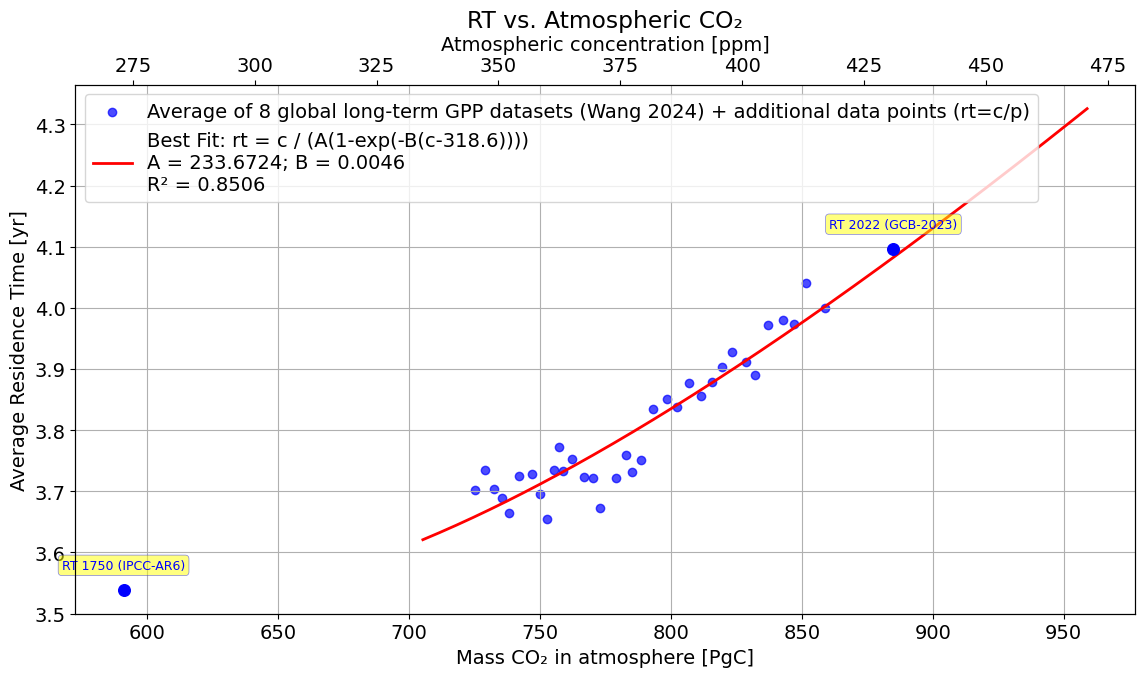

In [10]:
# --- Prepare data for plotting ---
# Generate a range of 'c' values for plotting the smooth fitted curve
c_fit = np.linspace(min(c_data) - 20, max(c_data) + 100, 200) # Extend range slightly for smoother fit line
p_fit_line = fit_function(c_fit, A_opt_g, B_opt_g)

# Specific points for green annotation (already in data, but highlighted)
c_green_points = [591, 885]
p_green_points = [167, 216]
labels_green_points = ["GPP 1750 (IPCC-AR6)", "GPP 2022 (GCB-2023)"]

# Specific points for green annotation (already in data, but highlighted)
c_green_rts = [591, 885]
p_green_rts = [3.539, 4.097]
labels_green_rts = ["RT 1750 (IPCC-AR6)", "RT 2022 (GCB-2023)"]

# --- Calculate Residence Time (RT = c/p) ---
# Calculate RT for original data points
# Handle division by zero or very small p values if they occur, though unlikely with GPP data.
rt_data = np.array([c / p if p != 0 else np.nan for c, p in zip(c_data, p_data)])

# Calculate RT for the fitted GPP line
# Ensure p_fit_line values are not zero before division
rt_fit_line = np.array([c / p_val if p_val != 0 else np.nan for c, p_val in zip(c_fit, p_fit_line)])

# --- Plotting ---
fig, ax3 = plt.subplots(figsize=(12, 7), sharex=False) 



# --- Bottom Plot: Average Residence Time (RT) vs. Mass CO₂ (c) ---
ax3.scatter(c_data, rt_data, label='Average of 8 global long-term GPP datasets (Wang 2024) + additional data points (rt=c/p)', color='blue', alpha=0.7)
ax3.plot(c_fit, rt_fit_line, color='red', linewidth=2, 
         label=f'Best Fit: rt = c / (A(1-exp(-B(c-318.6))))\nA = {A_opt_g:.4f}; B = {B_opt_g:.4f}\nR² = {r_squared:.4f}') # Plot the fitted curve for RT
#         label='RT from fitted GPP line (c/p_fit)')

# Plot the new data points in green and annotate them
ax3.scatter(c_green_rts, p_green_rts, color='blue', s=70, zorder=5) # zorder to ensure visibility
for i in range(len(c_green_rts)):
    ax3.annotate(labels_green_rts[i], (c_green_rts[i], p_green_rts[i]),
                 textcoords="offset points", xytext=(0, 15), ha='center', color='blue', fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", lw=0.5, alpha=0.5))






ax3.set_xlabel('Mass CO₂ in atmosphere [PgC]')
ax3.set_ylabel('Average Residence Time [yr]')
ax3.set_title('RT vs. Atmospheric CO₂')
ax3.legend()
ax3.grid(True)

# Add second horizontal axis for ax3 (PgC to ppm) - automatically shared if ax1 and ax3 share x
# No need to explicitly create another twin for ax3 if ax1 and ax3 share X,
# as ax2 will align with ax3 as well.
# However, if we want the label *only* on the bottom, we define ax4 here.
ax4 = ax3.twiny()
ax4.set_xlim(PgC_to_ppm_converter(xlim_PgC[0]), PgC_to_ppm_converter(xlim_PgC[1]))
ax4.set_xlabel('Atmospheric concentration [ppm]')
# Make ax2's label invisible if we only want it on ax4
# ax2.set_xlabel('')
# ax2.set_xticklabels([]) # Hide ticks as well if not showing label

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('rt vs gpp.png')

# --- Calculate and display error metrics for GPP fit ---
p_predicted = fit_function(c_data, A_opt_g, B_opt_g)
residuals = p_data - p_predicted
rmse = np.sqrt(np.mean(residuals**2))
ss_total = np.sum((p_data - np.mean(p_data))**2)
ss_residual = np.sum(residuals**2)
r_squared = 1 - (ss_residual / ss_total)

print(f"Root Mean Squared Error (RMSE) for GPP fit: {rmse:.4f}")
print(f"R-squared (R^2) for GPP fit: {r_squared:.4f}")


# Plot average Residence Time vs. GPP

- Dataset wang_global_p_ext
- Oceanic fertilization effect proportional to terrestrial effect
- Total = terrestrial + oceanic


Optimal A: 233.6724
Optimal B: 0.0046
RMSE for RT fit: 0.0767
R-squared for RT fit: 0.6147


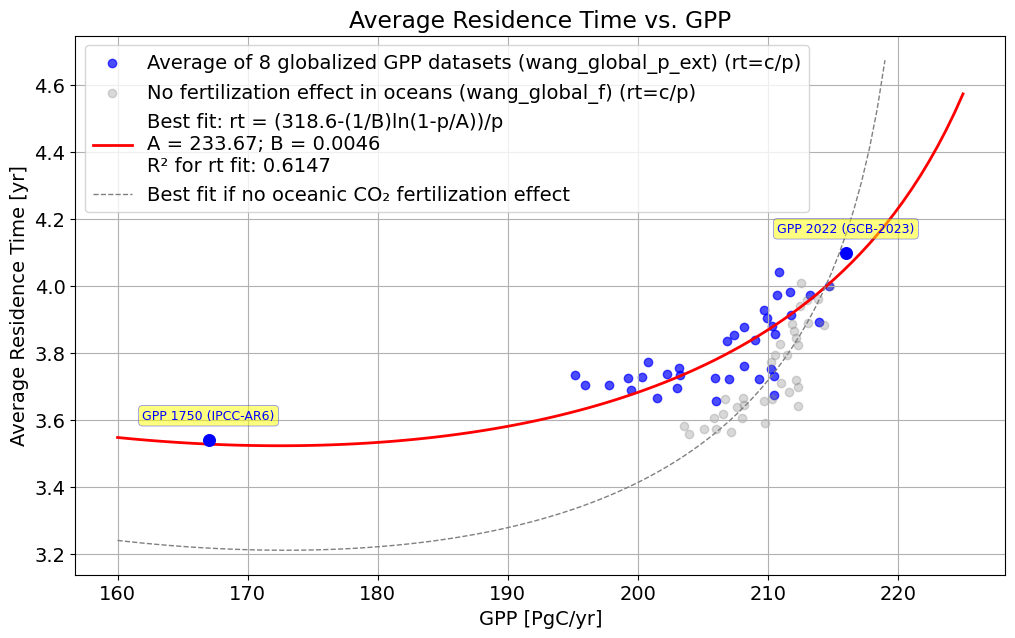

In [11]:
print(f"Optimal A: {A_opt_g:.4f}")
print(f"Optimal B: {B_opt_g:.4f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
# print(f"R-squared (R^2): {r_squared:.4f}")

# FIXED C VALUE as requested
C_FIXED = 318.6

# Define the non-linear function to fit: p = A(1 - exp(-B(c-C)))
# C is now a fixed constant, not a parameter to be fitted
def fit_function_AB(c_input, A, B):
    return A * (1 - np.exp(-B * (c_input - C_FIXED)))

# Extract 'c' and 'p' values from the DataFrame
c_data = wang_global_p_ext['c'].values
p_data = wang_global_p_ext['p'].values
p_data_f = wang_global_f['p'].values

# Specific points for green annotation (already in data, but highlighted)
rt_green_points = [3.539, 4.097]
p_green_points = [167, 216]
labels_green_points = ["GPP 1750 (IPCC-AR6)", "GPP 2022 (GCB-2023)"]


# --- Calculate Residence Time (RT = m/p) for original data points ---
# Ensure no division by zero for p_data
rt_data = np.array([c / p if p != 0 else np.nan for c, p in zip(c_data, p_data)])
rt_data_f = np.array([c / p if p != 0 else np.nan for c, p in zip(c_data, p_data_f)])

# --- Define the function for RT in terms of p using the optimal A, B, and FIXED C ---
# RT = (C - (1/B) * ln(1 - p/A)) / p
def rt_function_of_p_fixed_C(p_input, A, B, C_fixed_val):
    term_inside_log = 1 - p_input / A
    term_inside_log = np.maximum(term_inside_log, 1e-9) # Prevent log(0) or log(negative)

    # Ensure numerator is also calculated for each p_input value
    numerator = C_fixed_val - (1 / B) * np.log(term_inside_log)
    
    # Return RT values, handling potential division by zero for p_input
    return np.array([num_val / p_val if p_val != 0 else np.nan for num_val, p_val in zip(numerator, p_input)])


# --- Generate points for the fitted RT curve ---
# Create a range of p-values for plotting the RT curve.
# It should cover the observed p_data range.
# p_fit_range = np.linspace(np.min(p_data), np.max(p_data) + 5, 100) # Extend range slightly if needed
p_fit_range = np.linspace(160, 225, 100) # Extend range slightly if needed
p_fit_range_f = np.linspace(160, 219, 100) # Extend range slightly if needed

# Calculate RT values for the fitted line using the newly found A, B and fixed C
# rt_fit_line = rt_function_of_p_fixed_C(p_fit_range, A_opt_fixed_C, B_opt_fixed_C, C_FIXED)
rt_fit_line = rt_function_of_p_fixed_C(p_fit_range, A_opt_g, B_opt_g, C_FIXED)
rt_fit_line_f = rt_function_of_p_fixed_C(p_fit_range_f, A_opt_f, B_opt_f, C_FIXED) # no oceanic CO₂ fertilization effect

# --- Calculate and display error metrics for p = A(1 - exp(-B(c-C))) fit ---
p_predicted_from_fit = fit_function_AB(c_data, A_opt_g, B_opt_g)
residuals_p_fit = p_data - p_predicted_from_fit
rmse_p_fit = np.sqrt(np.mean(residuals_p_fit**2))
ss_total_p_fit = np.sum((p_data - np.mean(p_data))**2)
ss_residual_p_fit = np.sum(residuals_p_fit**2)
r_squared_p_fit = 1 - (ss_residual_p_fit / ss_total_p_fit)

# print(f"RMSE for p = A(1 - exp(-B(c-C))) fit: {rmse_p_fit:.4f}")
# print(f"R-squared for p = A(1 - exp(-B(c-C))) fit: {r_squared_p_fit:.4f}")

# --- Calculate and display error metrics for RT fit ---
# Calculate predicted RT values based on the fitted RT function and original p_data
rt_predicted_from_fit = rt_function_of_p_fixed_C(p_data, A_opt_g, B_opt_g, C_FIXED)

# Remove NaN values before calculating residuals, RMSE, and R-squared for RT
# This handles cases where p_data might have zeros leading to NaN in rt_data or rt_predicted_from_fit
valid_indices = ~np.isnan(rt_data) & ~np.isnan(rt_predicted_from_fit)
rt_data_valid = rt_data[valid_indices]
rt_predicted_valid = rt_predicted_from_fit[valid_indices]

if len(rt_data_valid) > 0:
    residuals_rt_fit = rt_data_valid - rt_predicted_valid
    rmse_rt_fit = np.sqrt(np.mean(residuals_rt_fit**2))

    ss_total_rt_fit = np.sum((rt_data_valid - np.mean(rt_data_valid))**2)
    ss_residual_rt_fit = np.sum(residuals_rt_fit**2)

    # Avoid division by zero for R-squared if ss_total is zero (i.e., all rt_data_valid points are the same)
    if ss_total_rt_fit > 0:
        r_squared_rt_fit = 1 - (ss_residual_rt_fit / ss_total_rt_fit)
    else:
        r_squared_rt_fit = 1.0 # Perfect fit if no variance in data

    print(f"RMSE for RT fit: {rmse_rt_fit:.4f}")
    print(f"R-squared for RT fit: {r_squared_rt_fit:.4f}")
else:
    print("\nCannot calculate RMSE and R-squared for RT fit: No valid data points after NaN removal.")





# --- Plotting RT as a function of p ---
#plt.figure(figsize=(10, 6))

fig, ax1 = plt.subplots(figsize=(12, 7)) # Use subplots to get an axes object (ax1)



plt.scatter(p_data, rt_data, label='Average of 8 globalized GPP datasets (wang_global_p_ext) (rt=c/p)', color='blue', alpha=0.7)
plt.scatter(p_data_f, rt_data_f, label='No fertilization effect in oceans (wang_global_f) (rt=c/p)', color='gray', alpha=0.3)
plt.plot(p_fit_range, rt_fit_line, color='red', linewidth=2,
         label=f'Best fit: rt = (318.6-(1/B)ln(1-p/A))/p\nA = {A_opt_g:.2f}; B = {B_opt_g:.4f}\nR² for rt fit: {r_squared_rt_fit:.4f}')
plt.plot(p_fit_range_f, rt_fit_line_f, color='gray', linewidth=1, linestyle='dashed',
         label=f'Best fit if no oceanic CO₂ fertilization effect')


# Plot the new data points in green and annotate them
ax1.scatter(p_green_points, rt_green_points,  color='blue', s=70, zorder=5) # zorder to ensure visibility
for i in range(len(p_green_points)):
    ax1.annotate(labels_green_points[i], (p_green_points[i], rt_green_points[i]),
                 textcoords="offset points", xytext=(0, 15), ha='center', color='blue', fontsize=9,
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="b", lw=0.5, alpha=0.5))





plt.xlabel('GPP [PgC/yr]') # Horizontal axis: p (GPP)
plt.ylabel('Average Residence Time [yr]') # Vertical axis: RT
plt.title('Average Residence Time vs. GPP')
plt.legend()
plt.grid(True)
plt.savefig('Average Residence Time vs. GPP.png')


# print(f"\nChart 'rt_vs_p_chart_C_fixed.png' generated showing RT as a function of p with C fixed.")



# Plot average Residence Time vs. terrestrial GPP

- Dataset wang_global_p_ext
- Oceanic fertilization effect proportional to terrestrial effect
- Total = terrestrial + oceanic


Optimal A: 133.4964
Optimal B: 0.0047
RMSE for RT fit (prop. ocean): 0.0788
R-squared for RT fit (prop. ocean): 0.4683
RMSE for RT fit (no. ocean): 0.0784
R-squared for RT fit (no. ocean): 0.6818


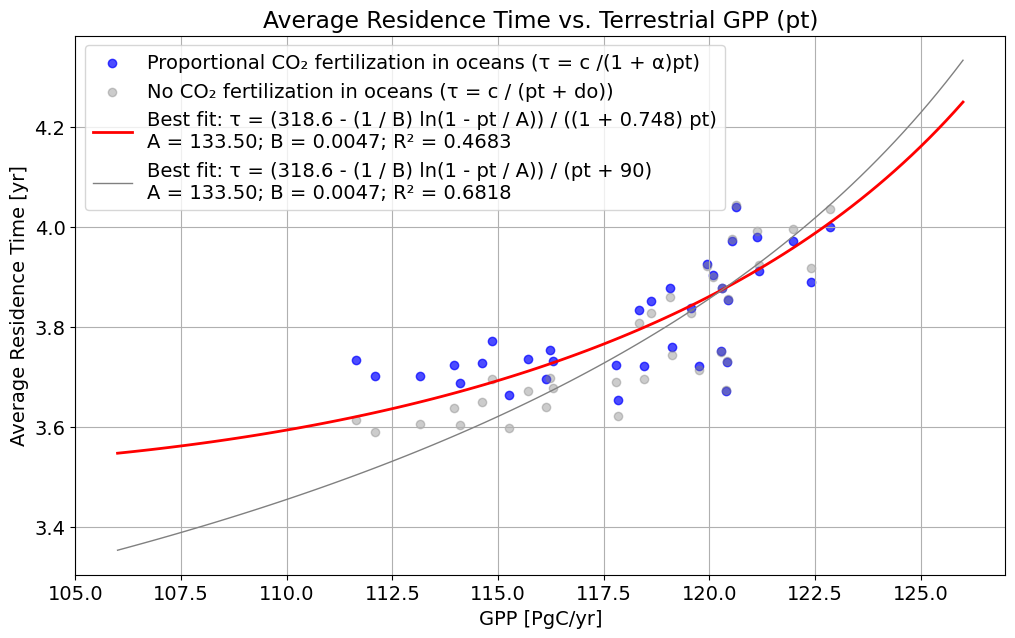

In [12]:
print(f"Optimal A: {A_opt_t:.4f}")
print(f"Optimal B: {B_opt_t:.4f}")

C_FIXED = 318.6 # minimum CO₂ level for vegetation: 150 ppm = 318.6 PgC 
DO_FIXED = 90 # No fertilization effect in oceans (DO = 90 PgC)
ALPHA_FIXED = 0.748 # Proportional fertilization effect in oceans (ALPHA = 0.74)

# Define the non-linear function to fit: p = A(1 - exp(-B(c-C)))
def fit_function_AB(c_input, A, B):
    return A * (1 - np.exp(-B * (c_input - C_FIXED)))

# Extract 'c' and 'p' values from the DataFrame
c_data = wang_original['c'].values
pt_data = wang_original['p'].values
pt_fit_range = np.linspace(106, 126, 100) 
rt_data_prop_oc = np.array([c / ((1 + ALPHA_FIXED) * pt) if pt != 0 else np.nan for c, pt in zip(c_data, pt_data)]) # Proportional fertilization effect in oceans
rt_data_no_oc = np.array([c / (pt + DO_FIXED) if pt != 0 else np.nan for c, pt in zip(c_data, pt_data)]) # No fertilization effect in oceans


# Define the function for tau(pl)
def rt_func_of_pt_no_oc(p_input, A, B, C_fixed_val, po):
    # Ensure the argument for log is positive
    arg_log = 1 - (p_input / A)
    if arg_log <= 0:
        return np.nan # Return NaN for invalid pl values
    numerator = C_fixed_val - (1 / B) * np.log(arg_log)
    denominator = p_input + po
    if denominator == 0: # Avoid division by zero
        return np.nan        
    return numerator / denominator

# Define the function for tau(pl)
def rt_func_of_pt_prop_oc(p_input, A, B, C_fixed_val, alpha):
    # Ensure the argument for log is positive
    arg_log = 1 - (p_input / A)
    if arg_log <= 0:
        return np.nan # Return NaN for invalid pl values
    numerator = C_fixed_val - (1 / B) * np.log(arg_log)
    denominator = p_input * (1 + alpha)
    if denominator == 0: # Avoid division by zero
        return np.nan        
    return numerator / denominator

# --- Calculate and display error metrics 
rt_predicted_from_fit = [rt_func_of_pt_prop_oc(pt, A_opt_t, B_opt_t, C_FIXED, ALPHA_FIXED) for pt in pt_data]
residuals_pt_fit = rt_data_prop_oc - rt_predicted_from_fit
rmse_rt_fit_prop_oc = np.sqrt(np.mean(residuals_pt_fit**2))
ss_total_p_fit = np.sum((rt_data_prop_oc - np.mean(rt_data_prop_oc))**2)
ss_residual_pt_fit = np.sum(residuals_pt_fit**2)
r_squared_rt_fit_prop_oc = 1 - (ss_residual_pt_fit / ss_total_p_fit)
print(f"RMSE for RT fit (prop. ocean): {rmse_rt_fit_prop_oc:.4f}")
print(f"R-squared for RT fit (prop. ocean): {r_squared_rt_fit_prop_oc:.4f}")

rt_predicted_from_fit = [rt_func_of_pt_no_oc(pt, A_opt_t, B_opt_t, C_FIXED, DO_FIXED) for pt in pt_data]
residuals_pt_fit = rt_data_no_oc - rt_predicted_from_fit
rmse_rt_fit_no_oc = np.sqrt(np.mean(residuals_pt_fit**2))
ss_total_p_fit = np.sum((rt_data_no_oc - np.mean(rt_data_no_oc))**2)
ss_residual_pt_fit = np.sum(residuals_pt_fit**2)
r_squared_rt_fit_no_oc = 1 - (ss_residual_pt_fit / ss_total_p_fit)
print(f"RMSE for RT fit (no. ocean): {rmse_rt_fit_no_oc:.4f}")
print(f"R-squared for RT fit (no. ocean): {r_squared_rt_fit_no_oc:.4f}")


# Calculate RT values for the fitted line using the newly found A, B and fixed C
rt_values_prop_oc = [rt_func_of_pt_prop_oc(pt, A_opt_t, B_opt_t, C_FIXED, ALPHA_FIXED) for pt in pt_data] 
rt_values_no_oc = [rt_func_of_pt_no_oc(pt, A_opt_t, B_opt_t, C_FIXED, DO_FIXED) for pt in pt_data] 

rt_fit_line_no_oc = [rt_func_of_pt_no_oc(pt, A_opt_t, B_opt_t, C_FIXED, DO_FIXED) for pt in pt_fit_range] 
rt_fit_line_prop_oc = [rt_func_of_pt_prop_oc(pt, A_opt_t, B_opt_t, C_FIXED, ALPHA_FIXED) for pt in pt_fit_range] 

# --- Plotting RT as a function of p ---
#plt.figure(figsize=(10, 6))

fig, ax1 = plt.subplots(figsize=(12, 7)) # Use subplots to get an axes object (ax1)
plt.scatter(pt_data, rt_data_prop_oc, label='Proportional CO₂ fertilization in oceans (τ = c /(1 + α)pt)', color='blue', alpha=0.7)
plt.scatter(pt_data, rt_data_no_oc, label='No CO₂ fertilization in oceans (τ = c / (pt + do))', color='gray', alpha=0.4)
plt.plot(pt_fit_range, rt_fit_line_prop_oc, color='red', linewidth=2,
         label=f'Best fit: τ = (318.6 - (1 / B) ln(1 - pt / A)) / ((1 + 0.748) pt)\nA = {A_opt_t:.2f}; B = {B_opt_t:.4f}; R² = {r_squared_rt_fit_prop_oc:.4f}')
plt.plot(pt_fit_range, rt_fit_line_no_oc, color='gray', linewidth=1,
         label=f'Best fit: τ = (318.6 - (1 / B) ln(1 - pt / A)) / (pt + 90)\nA = {A_opt_t:.2f}; B = {B_opt_t:.4f}; R² = {r_squared_rt_fit_no_oc:.4f}')

plt.xlabel('GPP [PgC/yr]') # Horizontal axis: p (GPP)
plt.ylabel('Average Residence Time [yr]') # Vertical axis: RT
plt.title('Average Residence Time vs. Terrestrial GPP (pt)')
plt.legend()
plt.grid(True)
plt.savefig('Average Residence Time vs. terrestrial GPP.png')